In [993]:
import numpy as np
import matplotlib.pyplot as plt

In [994]:
# modelling the arrival process
# per second converyor belt
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 

In [995]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return int(N)

In [996]:
# total number of entities conveyor1 delivers per second for 1000 seconds
c1sample=[poisson_est(1)  for i in range(1000)]


In [997]:
# total entities conveyor belt delivers
totalc1=sum(c1sample)
totalc1

948

In [998]:
def conveyor2(time):
    # number of entities conveyor2 delivers over a given time
    return (int(time/1.5))
conveyor2(1000)

666

In [999]:
def failtime(frate,time):
    # per unit time
    time=time%100
    # cdf of failure 
    c_fail=1 - np.exp(-frate* time)
    if(c_fail>=np.random.random()):
        return time
    else: 
        return 0    

In [1000]:
def failnow(frate,time):
    # prob of failure in next second
    p_fail=frate*np.exp(-frate*0)+ frate*np.exp(-frate*1)

    if(p_fail>=np.random.random()):
        return time
    else: 
        return 0 

In [1001]:
f=np.array([failnow(0.01,time) for time in range(10000)])
(10000-sum(f==0)) /10000
# failtime=
f[f!=0]

array([  12,   49,   62,   83,   88,  108,  160,  166,  172,  180,  260,
        341,  350,  363,  412,  414,  461,  474,  510,  571,  597,  638,
        642,  654,  657,  680,  974,  982,  990, 1076, 1187, 1243, 1245,
       1341, 1404, 1667, 1724, 1808, 1814, 1935, 2023, 2055, 2062, 2128,
       2132, 2153, 2322, 2406, 2490, 2504, 2513, 2514, 2716, 2737, 2811,
       2824, 2910, 2988, 3072, 3115, 3169, 3170, 3277, 3288, 3363, 3426,
       3453, 3547, 3555, 3698, 3739, 3785, 3831, 3842, 3860, 3927, 4002,
       4044, 4104, 4114, 4335, 4367, 4431, 4434, 4465, 4466, 4487, 4508,
       4562, 4660, 4662, 4663, 4744, 5026, 5043, 5172, 5304, 5363, 5385,
       5405, 5421, 5425, 5449, 5468, 5484, 5497, 5498, 5525, 5527, 5586,
       5657, 5751, 5760, 5769, 5869, 5924, 5927, 5939, 6087, 6093, 6141,
       6266, 6325, 6356, 6370, 6380, 6403, 6441, 6633, 6652, 6656, 6699,
       6761, 6837, 6903, 7062, 7100, 7110, 7131, 7204, 7276, 7292, 7308,
       7338, 7350, 7387, 7436, 7473, 7476, 7536, 76

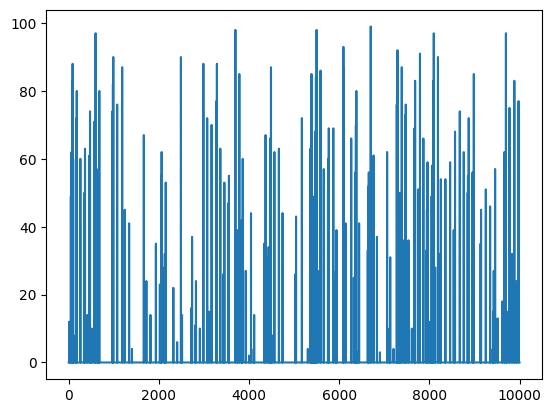

In [1002]:
f=f%100
plt.plot(np.arange(0,10000),f)

In [1003]:
# for each second, check the 
def simulate(time):
    C1event=[]
    stationFailures=[]
    completed=0
    downtime=0
    # stacks to count waiting entities at each conveyour belt C
    stackC1=[]
    stackC2=[]
    def stackpop(stackC1,stackC2):
        if stackC2[-1]==1:
            stackC2.pop()
        else:
            stackC2[-1]-=1 
        
        if stackC1[-1]==1:
            stackC1.pop() 
        else:
            stackC1[-1]==1
            
    def addtoC1(time_index,stackC1,C1event):
            if not stackC1:
                stackC1.append(C1event[time_index])
            else:
                # print(time_index,C1event[time_index],stackC1[-1],stackC2)
                stackC1.append(C1event[time_index]+stackC1[-1])

    # add a entity to the stack every 1.5 seconds
    def addtoC2(time_index,stackC2):
        if (time_index==0):pass
        if time_index%1.5==0 or (time_index-0.5)%1.5==0:
            if len(stackC2)==0:
                stackC2.append(1)
            else:
                stackC2.append(stackC2[-1]+1)


# simulate events with respect to random variables
    for t in np.arange(time):
        C1event.append(poisson_est(1))
        stationFailures.append(failnow(0.01,t))

    for time_index in np.arange(time):
        if time_index>time-1:
            return completed
        
        addtoC1(time_index,stackC1,C1event)
        addtoC2(time_index,stackC2)

        # if both parts are ready
        if stackC1 and stackC2 and stackC1[-1]>0 and stackC2[-1]>0:
            # check if the machine is not working
            if stationFailures[time_index]>0:
                for standyby in range(0,5):
                    curr=standyby+time_index+1
                    # conveyors run during downtime
                    addtoC1(curr,stackC1,C1event)
                    addtoC2(curr,stackC2)
                downtime+=5
                # machine fails close to the end of the testing time
                if time_index+5>=time-1:
                    return completed

                # count continues 5 seconds after
                time_index+=5
                stackpop(stackC1,stackC2)
            
                completed+=1
            else: #if the machine is working
                # do this or a while loop - while there are parts
                stackpop(stackC1,stackC2)
                completed+=1
        # print("\npost\nstackc2",stackC2,"\nstackc1",stackC1,'\ntime',time_index,'\n',completed,'\n\n')
    return completed,downtime

In [1004]:
simulate(10)

(8, 0)

In [1005]:
# will station1 do all work available instantly or one per unit time, while loop or one per iteration
# can parts + downtime> total time
# end behavior, produce or no
